In [1]:
import os
import ast
import json
import shutil
import platform
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

tqdm.pandas()
if platform.node() == 'Nick_Laptop':
    drive = 'C'
elif platform.node() == 'MSI':
    drive = 'D'
else:
    drive = 'uhhhhhh'
    print('Uhhhhhhhhhhhhh')
os.chdir(f'{drive}:/PhD/DissolutionProgramming/LND---Land-Paper')

PROCESSED = 'Data/Processed'
RAW = 'Data/Raw'
SURNAMES = f'{PROCESSED}/surname_info'
TABLES = 'Output/Tables'

In [2]:

# %% Load data
df = pd.read_csv(f'{SURNAMES}/combined_id_subsidy_data.csv', encoding='utf-8')

with open(f'{PROCESSED}/pretty_dict.json', 'r', encoding='utf-8') as f:
    pretty_dict = json.load(f)

for year in [
    1524, 
    1543,
    1581,
    1674,
    1840
]:
    for measure in [
        'avg_val',
        'tot_val',
        'max_val',
        'count'
    ]:
        df[f'{measure}_{year}'] = df[f'{measure}_{year}'].apply(lambda x: 0 if pd.isna(x) else x)
        


#### Markov Process Regressions

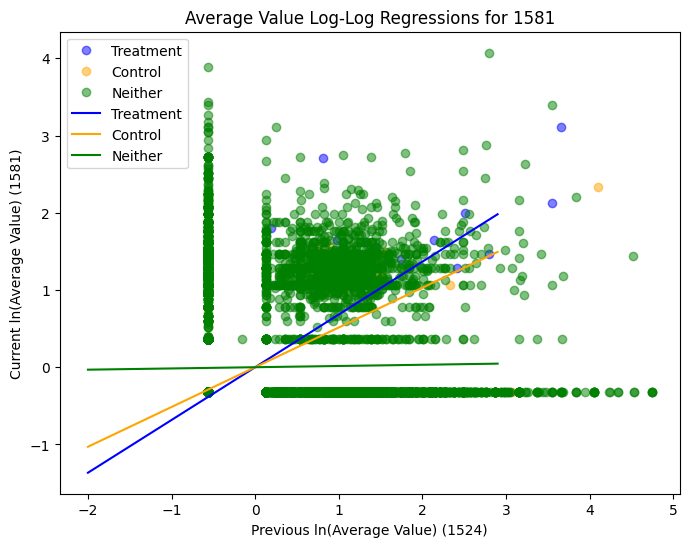

1581 Average Value treatment: 0.683, control: 0.515, neither: 0.016
                                    OLS Regression Results                                    
Dep. Variable:     avg_val_log_centered_1581   R-squared (uncentered):                   0.007
Model:                                   OLS   Adj. R-squared (uncentered):              0.007
Method:                        Least Squares   F-statistic:                              33.55
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                    1.29e-21
Time:                               13:15:32   Log-Likelihood:                         -18905.
No. Observations:                      19020   AIC:                                  3.782e+04
Df Residuals:                          19017   BIC:                                  3.784e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

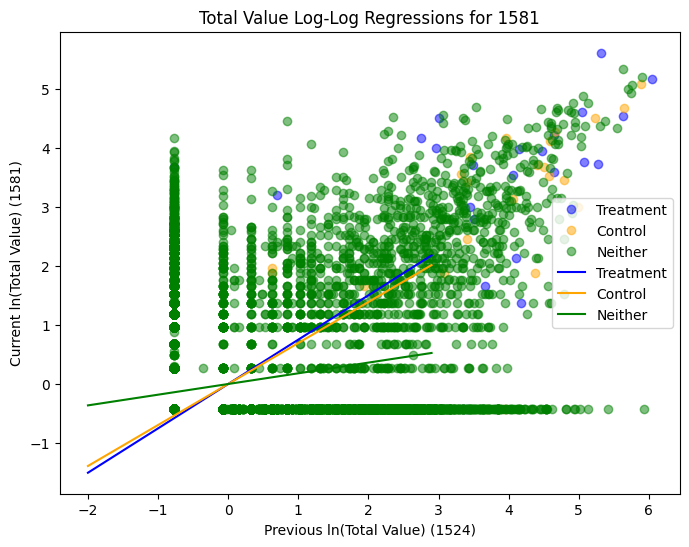

1581 Total Value treatment: 0.752, control: 0.695, neither: 0.181
                                    OLS Regression Results                                    
Dep. Variable:     tot_val_log_centered_1581   R-squared (uncentered):                   0.080
Model:                                   OLS   Adj. R-squared (uncentered):              0.080
Method:                        Least Squares   F-statistic:                              226.3
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                   2.84e-144
Time:                               13:15:32   Log-Likelihood:                         -24695.
No. Observations:                      19020   AIC:                                  4.940e+04
Df Residuals:                          19017   BIC:                                  4.942e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                   

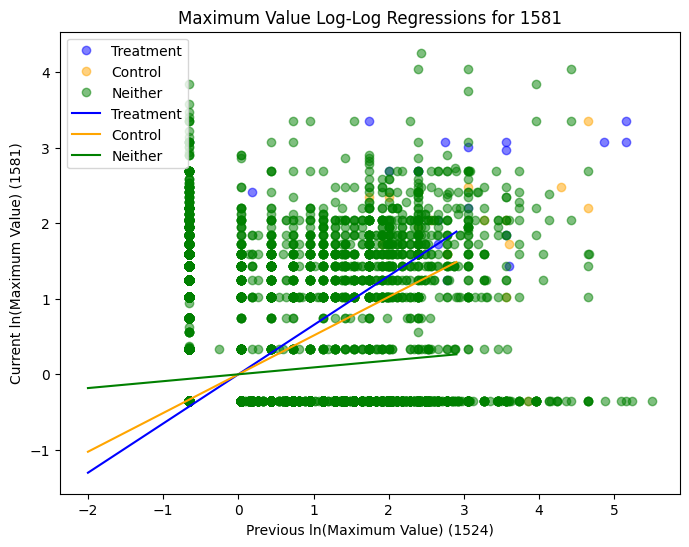

1581 Maximum Value treatment: 0.652, control: 0.513, neither: 0.091
                                    OLS Regression Results                                    
Dep. Variable:     max_val_log_centered_1581   R-squared (uncentered):                   0.030
Model:                                   OLS   Adj. R-squared (uncentered):              0.030
Method:                        Least Squares   F-statistic:                              116.5
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                    9.29e-75
Time:                               13:15:32   Log-Likelihood:                         -20894.
No. Observations:                      19020   AIC:                                  4.179e+04
Df Residuals:                          19017   BIC:                                  4.182e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

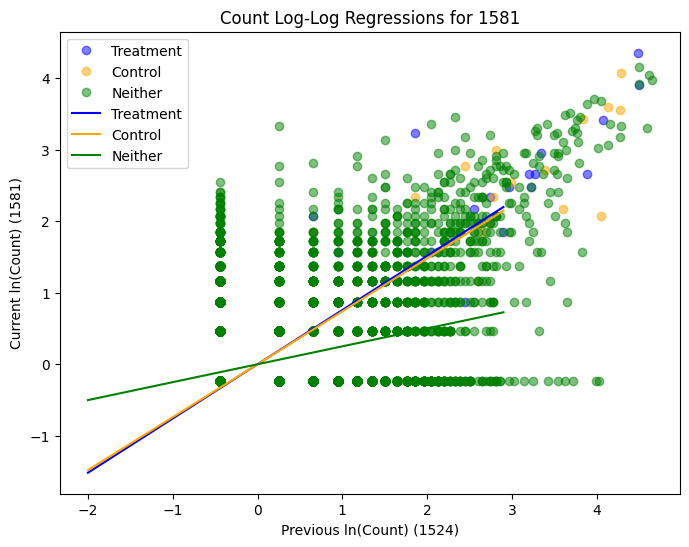

1581 Count treatment: 0.758, control: 0.740, neither: 0.250
                                   OLS Regression Results                                   
Dep. Variable:     count_log_centered_1581   R-squared (uncentered):                   0.146
Model:                                 OLS   Adj. R-squared (uncentered):              0.146
Method:                      Least Squares   F-statistic:                              297.3
Date:                     Tue, 02 Dec 2025   Prob (F-statistic):                   1.32e-188
Time:                             13:15:33   Log-Likelihood:                         -12954.
No. Observations:                    19020   AIC:                                  2.591e+04
Df Residuals:                        19017   BIC:                                  2.594e+04
Df Model:                                3                                                  
Covariance Type:                       HC3                                                  
          

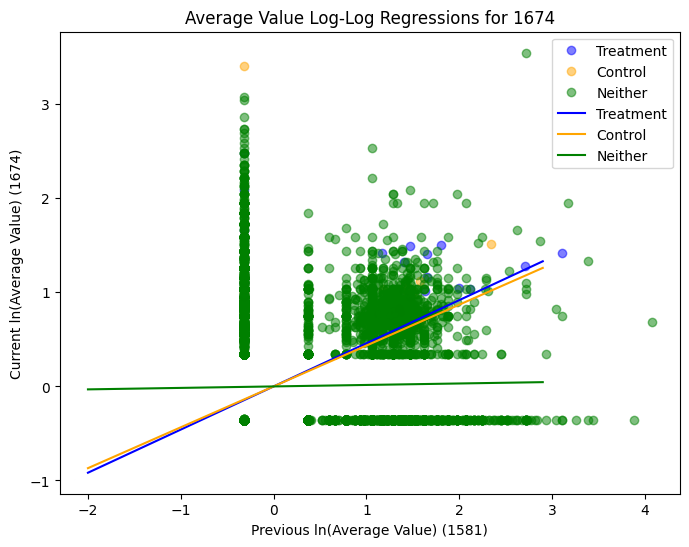

1674 Average Value treatment: 0.459, control: 0.435, neither: 0.016
                                    OLS Regression Results                                    
Dep. Variable:     avg_val_log_centered_1674   R-squared (uncentered):                   0.005
Model:                                   OLS   Adj. R-squared (uncentered):              0.005
Method:                        Least Squares   F-statistic:                              25.47
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                    1.95e-16
Time:                               13:15:33   Log-Likelihood:                         -15528.
No. Observations:                      19020   AIC:                                  3.106e+04
Df Residuals:                          19017   BIC:                                  3.109e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

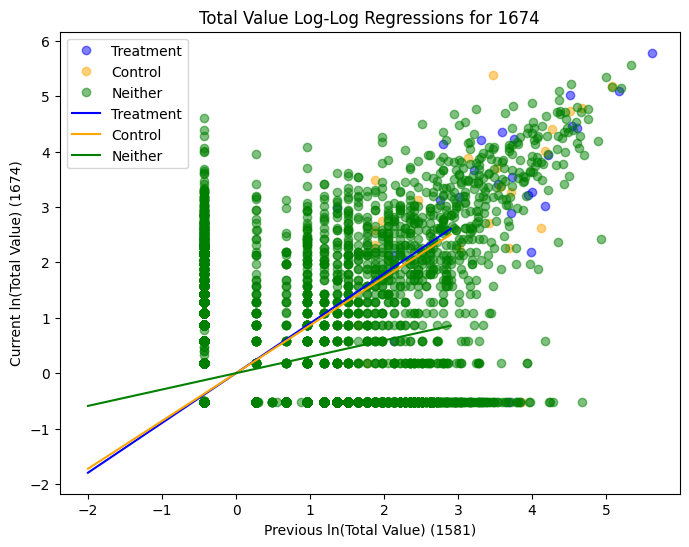

1674 Total Value treatment: 0.899, control: 0.863, neither: 0.296
                                    OLS Regression Results                                    
Dep. Variable:     tot_val_log_centered_1674   R-squared (uncentered):                   0.117
Model:                                   OLS   Adj. R-squared (uncentered):              0.117
Method:                        Least Squares   F-statistic:                              293.6
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                   2.53e-186
Time:                               13:15:33   Log-Likelihood:                         -24042.
No. Observations:                      19020   AIC:                                  4.809e+04
Df Residuals:                          19017   BIC:                                  4.811e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                   

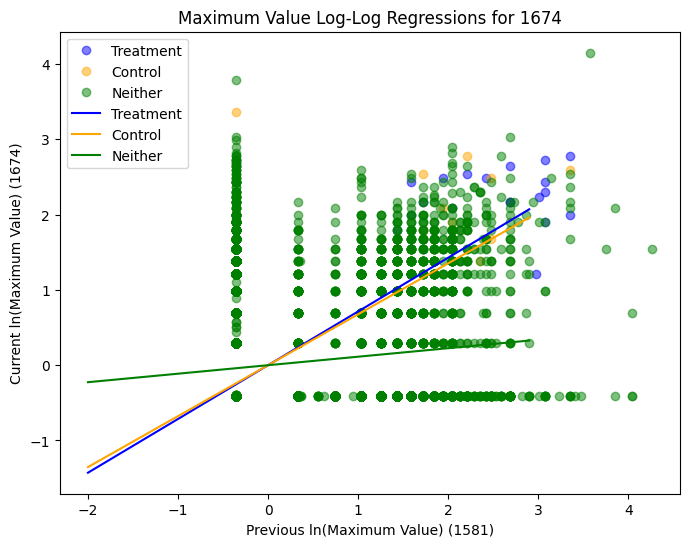

1674 Maximum Value treatment: 0.714, control: 0.676, neither: 0.113
                                    OLS Regression Results                                    
Dep. Variable:     max_val_log_centered_1674   R-squared (uncentered):                   0.032
Model:                                   OLS   Adj. R-squared (uncentered):              0.031
Method:                        Least Squares   F-statistic:                              111.3
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                    1.82e-71
Time:                               13:15:33   Log-Likelihood:                         -18427.
No. Observations:                      19020   AIC:                                  3.686e+04
Df Residuals:                          19017   BIC:                                  3.688e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

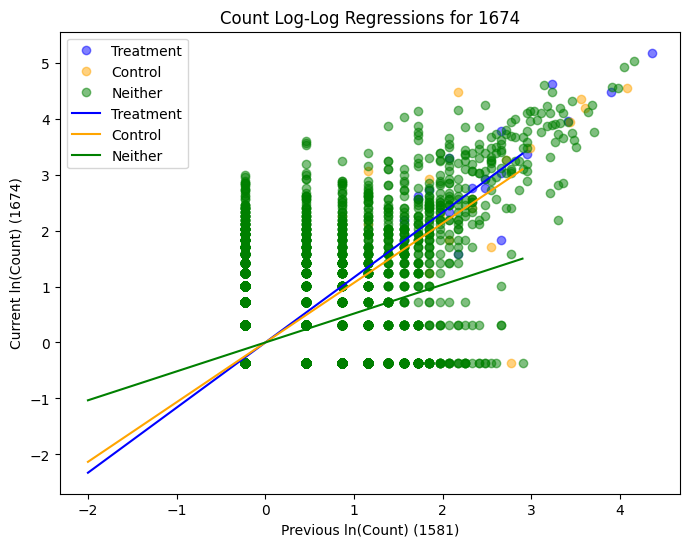

1674 Count treatment: 1.163, control: 1.066, neither: 0.516
                                   OLS Regression Results                                   
Dep. Variable:     count_log_centered_1674   R-squared (uncentered):                   0.188
Model:                                 OLS   Adj. R-squared (uncentered):              0.188
Method:                      Least Squares   F-statistic:                              486.6
Date:                     Tue, 02 Dec 2025   Prob (F-statistic):                   1.08e-304
Time:                             13:15:33   Log-Likelihood:                         -17447.
No. Observations:                    19020   AIC:                                  3.490e+04
Df Residuals:                        19017   BIC:                                  3.492e+04
Df Model:                                3                                                  
Covariance Type:                       HC3                                                  
          

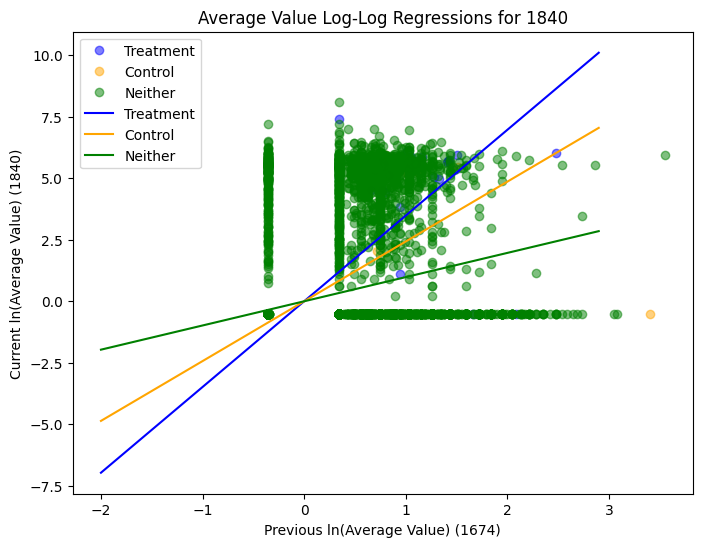

1840 Average Value treatment: 3.483, control: 2.430, neither: 0.983
                                    OLS Regression Results                                    
Dep. Variable:     avg_val_log_centered_1840   R-squared (uncentered):                   0.128
Model:                                   OLS   Adj. R-squared (uncentered):              0.128
Method:                        Least Squares   F-statistic:                              405.0
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                   5.02e-255
Time:                               13:15:34   Log-Likelihood:                         -34547.
No. Observations:                      19020   AIC:                                  6.910e+04
Df Residuals:                          19017   BIC:                                  6.912e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

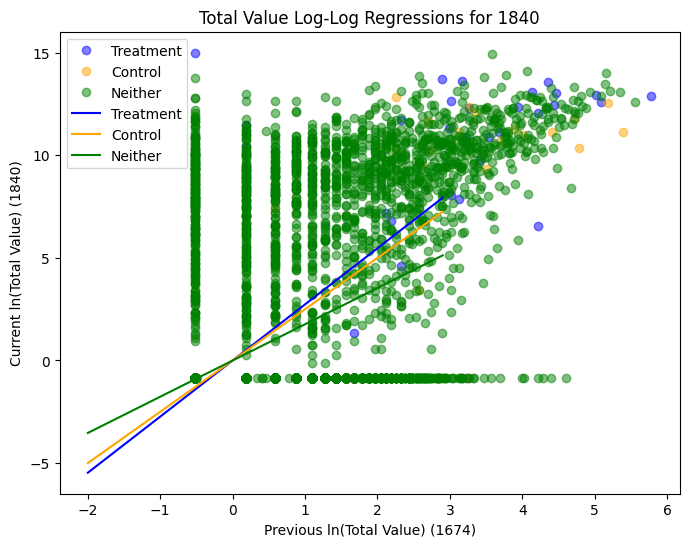

1840 Total Value treatment: 2.735, control: 2.499, neither: 1.766
                                    OLS Regression Results                                    
Dep. Variable:     tot_val_log_centered_1840   R-squared (uncentered):                   0.357
Model:                                   OLS   Adj. R-squared (uncentered):              0.357
Method:                        Least Squares   F-statistic:                              1104.
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                        0.00
Time:                               13:15:34   Log-Likelihood:                         -42119.
No. Observations:                      19020   AIC:                                  8.424e+04
Df Residuals:                          19017   BIC:                                  8.427e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                   

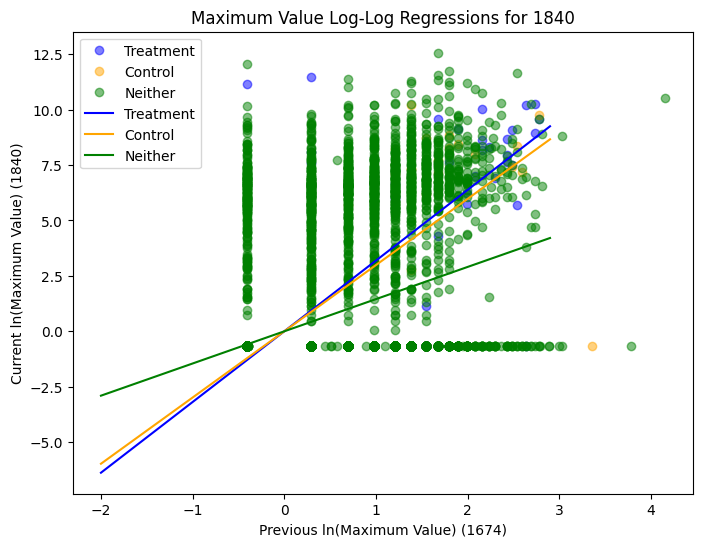

1840 Maximum Value treatment: 3.189, control: 2.987, neither: 1.452
                                    OLS Regression Results                                    
Dep. Variable:     max_val_log_centered_1840   R-squared (uncentered):                   0.223
Model:                                   OLS   Adj. R-squared (uncentered):              0.223
Method:                        Least Squares   F-statistic:                              598.3
Date:                       Tue, 02 Dec 2025   Prob (F-statistic):                        0.00
Time:                               13:15:34   Log-Likelihood:                         -38575.
No. Observations:                      19020   AIC:                                  7.716e+04
Df Residuals:                          19017   BIC:                                  7.718e+04
Df Model:                                  3                                                  
Covariance Type:                         HC3                                 

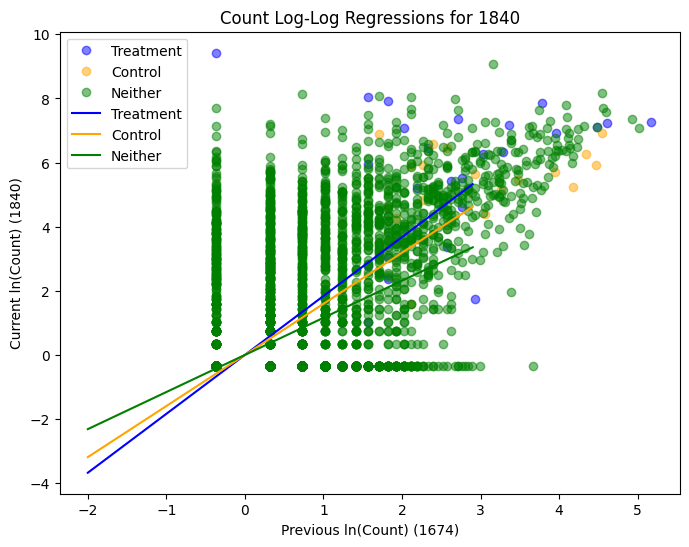

1840 Count treatment: 1.837, control: 1.594, neither: 1.157
                                   OLS Regression Results                                   
Dep. Variable:     count_log_centered_1840   R-squared (uncentered):                   0.421
Model:                                 OLS   Adj. R-squared (uncentered):              0.421
Method:                      Least Squares   F-statistic:                              1221.
Date:                     Tue, 02 Dec 2025   Prob (F-statistic):                        0.00
Time:                             13:15:34   Log-Likelihood:                         -25756.
No. Observations:                    19020   AIC:                                  5.152e+04
Df Residuals:                        19017   BIC:                                  5.154e+04
Df Model:                                3                                                  
Covariance Type:                       HC3                                                  
          

In [3]:
years_list = [1524, 1581, 1674, 1840]
for i, year in enumerate(years_list):
    for measure in [
        'avg_val',
        'tot_val',
        'max_val',
        'count'
    ]:
        if year == 1524:
            continue
        last_year = years_list[i - 1]

        sub_df = df.loc[df[f'{measure}_{year}'].notna() & df[f'{measure}_{last_year}'].notna()].copy()
        sub_df[f'{measure}_pctile_{year}'] = sub_df[f'{measure}_{year}'].rank(pct=True)
        sub_df[f'{measure}_pctile_{last_year}'] = sub_df[f'{measure}_{last_year}'].rank(pct=True)
        sub_df[f'{measure}_log_centered_{year}'] = np.log(sub_df[f'{measure}_{year}'] + 1) - np.log(sub_df[f'{measure}_{year}'] + 1).mean()
        sub_df[f'{measure}_log_centered_{last_year}'] = np.log(sub_df[f'{measure}_{last_year}'] + 1) - np.log(sub_df[f'{measure}_{last_year}'] + 1).mean()
        sub_df['neither'] = np.where(
            (sub_df['treatment'] != 1) & (sub_df['control'] != 1), 
            1, 
            0
        )
        sub_df[f'treatment_{measure}_pctile_{last_year}'] = np.where(
            sub_df['treatment'] == 1, 
            sub_df[f'{measure}_pctile_{last_year}'], 
            0
        )
        sub_df[f'treatment_{measure}_log_centered_{last_year}'] = np.where(
            sub_df['treatment'] == 1, 
            sub_df[f'{measure}_log_centered_{last_year}'], 
            0
        )
        sub_df[f'control_{measure}_pctile_{last_year}'] = np.where(
            sub_df['control'] == 1, 
            sub_df[f'{measure}_pctile_{last_year}'], 
            0
        )
        sub_df[f'control_{measure}_log_centered_{last_year}'] = np.where(
            sub_df['control'] == 1, 
            sub_df[f'{measure}_log_centered_{last_year}'], 
            0
        )
        sub_df[f'neither_{measure}_pctile_{last_year}'] = np.where(
            sub_df['neither'] == 1, 
            sub_df[f'{measure}_pctile_{last_year}'], 
            0
        )
        sub_df[f'neither_{measure}_log_centered_{last_year}'] = np.where(
            sub_df['neither'] == 1, 
            sub_df[f'{measure}_log_centered_{last_year}'], 
            0
        )

        tdf = sub_df.loc[sub_df['treatment'] == 1].copy()
        x_treat = tdf[f'{measure}_log_centered_{last_year}']
        y_treat = tdf[f'{measure}_log_centered_{year}']
        x_treat.rename(f'prev_value_treatment', inplace=True)

        x_treat = x_treat.fillna(0)
        y_treat = y_treat.fillna(0)

        result = sm.OLS(y_treat, x_treat).fit(cov_type='HC3')
        b_treatment = result.params['prev_value_treatment']


        cdf = sub_df.loc[sub_df['control'] == 1].copy()
        x_ctrl = cdf[f'{measure}_log_centered_{last_year}']
        y_ctrl = cdf[f'{measure}_log_centered_{year}']
        x_ctrl.rename(f'prev_value_control', inplace=True)

        x_ctrl = x_ctrl.fillna(0)
        y_ctrl = y_ctrl.fillna(0)

        result = sm.OLS(y_ctrl, x_ctrl).fit(cov_type='HC3')
        b_control = result.params['prev_value_control']

        rdf = sub_df.loc[(sub_df['treatment'] != 1) & (sub_df['control'] != 1)].copy()
        x_neither = rdf[f'{measure}_log_centered_{last_year}']
        y_neither = rdf[f'{measure}_log_centered_{year}']
        x_neither.rename(f'prev_value_neither', inplace=True)

        x_neither = x_neither.fillna(0)
        y_neither = y_neither.fillna(0)

        result = sm.OLS(y_neither, x_neither).fit(cov_type='HC3')
        b_neither = result.params['prev_value_neither']
        

        pretty_measure = pretty_dict[measure]
        # Plot treatment regression
        plt.figure(figsize=(8, 6))
        plt.xlabel(f'Previous ln({pretty_measure}) ({last_year})')
        plt.ylabel(f'Current ln({pretty_measure}) ({year})')
        plt.title(f'{pretty_measure} Log-Log Regressions for {year}')
        plt.plot(x_treat, y_treat, 'o', label='Treatment', color='blue', alpha=0.5)
        plt.plot(x_ctrl, y_ctrl, 'o', label='Control', color='orange', alpha=0.5)
        plt.plot(x_neither, y_neither, 'o', label='Neither', color='green', alpha=0.5)
        plt.plot(np.arange(-2, 3, .1), b_treatment * np.arange(-2, 3, .1), label='Treatment', color='blue')
        plt.plot(np.arange(-2, 3, .1), b_control *np.arange(-2, 3, .1), label='Control', color='orange')
        plt.plot(np.arange(-2, 3, .1), b_neither * np.arange(-2, 3, .1), label='Neither', color='green')
        plt.legend()
        plt.show()
        print(f'{year} {pretty_measure} treatment: {b_treatment:.3f}, control: {b_control:.3f}, neither: {b_neither:.3f}')

        

        x = sub_df[[f'treatment_{measure}_log_centered_{last_year}',
                    f'control_{measure}_log_centered_{last_year}',
                    f'neither_{measure}_log_centered_{last_year}']].copy()
        y = sub_df[f'{measure}_log_centered_{year}']

        x = x.fillna(0)
        y = y.fillna(0)
        
        model = sm.OLS(y, x)
        result = model.fit(cov_type='HC3')
        print(result.summary())
        hypothesis = f'treatment_{measure}_log_centered_{last_year} = control_{measure}_log_centered_{last_year}'
        print(result.t_test(hypothesis))
        hypothesis = f'treatment_{measure}_log_centered_{last_year} = neither_{measure}_log_centered_{last_year}'
        print(result.t_test(hypothesis))